In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install protobuf==3.20.0

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.18.0


In [4]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
NUM_CLASSES = 38 
DATA_DIR = '../input/plantvillage' 


print(f"Image size set to: {IMAGE_SIZE}")
print(f"Data directory is: {DATA_DIR}")

Image size set to: (256, 256)
Data directory is: ../input/plantvillage


In [6]:
train_dir = '../input/plantvillage/PlantVillage/train' # if you reading this ig you know what comes here..
val_dir = '../input/plantvillage/PlantVillage/val' # same here aswell :) please give me a jobbbbbbbb, i won't make weird comments i promise.

#train data
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,  
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# val data
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,   
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print(f"Loaded {len(class_names)} classes.")
print(f"First 5 classes: {class_names[:5]}...")

Found 43444 files belonging to 38 classes.
Found 10861 files belonging to 38 classes.
Loaded 38 classes.
First 5 classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']...


# Loading VGG16

In [7]:
import tensorflow as tf
from tensorflow import keras

# Custom wrapper to handle that old bs vgg16 format
class FixedRandomShear(keras.layers.RandomShear):
    @classmethod
    def from_config(cls, config):
        # Fix negative factors
        if 'x_factor' in config:
            x_factor = config['x_factor']
            if isinstance(x_factor, list) and len(x_factor) == 2:
                config['x_factor'] = [abs(x_factor[0]), abs(x_factor[1])]
        return super().from_config(config)

model = keras.models.load_model(
    '/kaggle/input/ai-vgg16/keras/default/1/plant_model_vgg16.h5',
    custom_objects={
        'RandomShear': FixedRandomShear,
        'FixedRandomShear': FixedRandomShear
    }
)

model.summary()

Model: "VGG16_Transfer_Learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,734,184 (56.21 MB)

 Trainable params: 14,734,182 (56.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [9]:
model.evaluate(val_ds) #passed

340/340 ━━━━━━━━━━━━━━━━━━━━ 52s 153ms/step - accuracy: 0.9762 - loss: 0.0711


[0.07532818615436554, 0.9749562740325928]

# Vgg19 loaded and tested

In [10]:
from tensorflow.keras.models import load_model

model_save_path = "/kaggle/input/vgg19-ft/keras/default/1/plant_model_vgg19ft.h5"

print(f"Loading model from {model_save_path}...")
loaded_model_vgg19 = load_model(model_save_path)
print("Model loaded successfully.")

loaded_model_vgg19.summary()

Loading model from /kaggle/input/vgg19-ft/keras/default/1/plant_model_vgg19ft.h5...


Model loaded successfully.


Model: "VGG19_Transfer_Learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 8, 8, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,043,880 (76.46 MB)

 Trainable params: 20,043,878 (76.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [11]:
loaded_model_vgg19.evaluate(val_ds) # passed

340/340 ━━━━━━━━━━━━━━━━━━━━ 66s 193ms/step - accuracy: 0.9462 - loss: 0.1784


[0.17913921177387238, 0.9450326561927795]

# Loaded inception and tested

In [12]:
from tensorflow.keras.models import load_model

model_save_path = "/kaggle/input/ai-inception/keras/default/1/plant_model_inception.h5"

print(f"Loading model from {model_save_path}...")
loaded_model_inception = load_model(model_save_path)
print("Model loaded successfully.")

loaded_model_inception.summary()

Loading model from /kaggle/input/ai-inception/keras/default/1/plant_model_inception.h5...


Model loaded successfully.


Model: "InceptionV3_Transfer_Learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 6, 6, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        77,862 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,880,648 (83.47 MB)

 Trainable params: 77,862 (304.15 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2 (12.00 B)

In [13]:
loaded_model_inception.evaluate(val_ds) # passed

340/340 ━━━━━━━━━━━━━━━━━━━━ 42s 105ms/step - accuracy: 0.9174 - loss: 0.2678


[0.265306293964386, 0.9157536029815674]

# Loaded Resnet and tested

In [14]:
from tensorflow.keras.models import load_model

model_save_path = "/kaggle/input/ai-resnet/keras/default/1/AI_resnet.h5"

print(f"Loading model from {model_save_path}...")
loaded_model_resnet = load_model(model_save_path)
print("Model loaded successfully.")

loaded_model_resnet.summary()

Loading model from /kaggle/input/ai-resnet/keras/default/1/AI_resnet.h5...


Model loaded successfully.


Model: "ResNet101V2_Transfer_Learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet101v2 (Functional)        │ (None, 8, 8, 2048)     │    42,626,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │        77,862 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,704,424 (162.90 MB)

 Trainable params: 77,862 (304.15 KB)

 Non-trainable params: 42,626,560 (162.61 MB)

 Optimizer params: 2 (12.00 B)

In [15]:
loaded_model_resnet.evaluate(val_ds) # passed

340/340 ━━━━━━━━━━━━━━━━━━━━ 84s 224ms/step - accuracy: 0.9510 - loss: 0.1481


[0.16018559038639069, 0.9481631517410278]

# Main ensemble thing

In [17]:
models_list = [model, loaded_model_vgg19, loaded_model_inception, loaded_model_resnet] # list of all experts 

In [18]:
for i in models_list:
    i.summary()

Model: "VGG16_Transfer_Learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,734,184 (56.21 MB)

 Trainable params: 14,734,182 (56.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "VGG19_Transfer_Learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 8, 8, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,043,880 (76.46 MB)

 Trainable params: 20,043,878 (76.46 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "InceptionV3_Transfer_Learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 6, 6, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │        77,862 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,880,648 (83.47 MB)

 Trainable params: 77,862 (304.15 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2 (12.00 B)

Model: "ResNet101V2_Transfer_Learning"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet101v2 (Functional)        │ (None, 8, 8, 2048)     │    42,626,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │        77,862 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,704,424 (162.90 MB)

 Trainable params: 77,862 (304.15 KB)

 Non-trainable params: 42,626,560 (162.61 MB)

 Optimizer params: 2 (12.00 B)

In [20]:
import numpy as np

In [21]:
# Get one batch of images and labels from the validation set
val_images, val_labels = next(iter(val_ds))

# this will get the prediction of all models for the batch
all_model_preds = [model.predict(val_images) for model in models_list]

# Convert the list of predictions into a single NumPy array
# Shape will be (4 models, 32 images, 38 classes)
preds_array = np.stack(all_model_preds)

print(f"Prediction array shape: {preds_array.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
Prediction array shape: (4, 32, 38)


In [22]:
# Soft voting block

# Average the probabilities from all 4 models
# We average across the 'models' axis (axis=0)
# Shape will be (32 images, 38 classes)
average_preds = np.mean(preds_array, axis=0)

# Find the class index with the highest average probability
# This is our final prediction
soft_vote_preds = np.argmax(average_preds, axis=1)

print("Soft Voting Complete.")
#comparing with real lables.
print(f"Soft Vote Predictions: {soft_vote_preds}")
print(f"Actual Labels: {val_labels.numpy()}")

Soft Voting Complete.
Soft Vote Predictions: [16 24 24 15 12  8 15  6 37 14  3  1  8 25 16 16 16 16 28 35 29 22 35 10
 24 16  4 13 35  4 22 35]
Actual Labels: [16 24 24 15 12  8 15  6 37 14  3  1  8 25 16 16 16 16 28 35 29 22 35 10
 24 16  4 13 35  4 22 35]


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Create empty lists to store all predictions and labels
all_soft_vote_preds = []
all_true_labels = []

print("Starting evaluation on the entire validation set...")

# Loop through the entire validation dataset 
for images, labels in val_ds:
    
    # Get predictions from all 4 models for the current batch
    all_model_preds = [model.predict(images, verbose=0) for model in models_list]
    
    # Stack them: (4 models, batch_size, 38 classes)
    preds_array = np.stack(all_model_preds)
    
    # Average the probabilities: (batch_size, 38 classes)
    average_preds = np.mean(preds_array, axis=0)
    
    # Get final prediction: (batch_size,)
    soft_vote_preds_batch = np.argmax(average_preds, axis=1)
    
    # Add this batch's predictions and labels to our master lists
    all_soft_vote_preds.extend(soft_vote_preds_batch)
    all_true_labels.extend(labels.numpy())

print("Evaluation complete.")


# Convert lists to NumPy arrays for easier handling
all_soft_vote_preds = np.array(all_soft_vote_preds)
all_true_labels = np.array(all_true_labels)

# Calculate overall accuracy
overall_accuracy = accuracy_score(all_true_labels, all_soft_vote_preds)

print("\n--- Overall Ensemble Performance (Soft Voting) ---")
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")

# Generate the detailed report (Accuracy, Precision, Recall, F1)
# We need the class names for the report
class_names = val_ds.class_names
print("\nClassification Report (like in the paper):")
print(classification_report(all_true_labels, all_soft_vote_preds, target_names=class_names))

# LIME to explain the things.

In [ ]:
!pip install lime

Explaining an image with actual label: Corn_(maize)___healthy (Class 10)


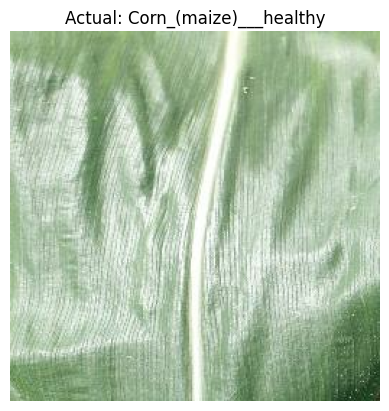

In [24]:
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

image_batch, label_batch = next(iter(val_ds))

# Grab the very first image and label from the batch
# We need to convert it from a Tensor to a NumPy array
# LIME also prefers images as (H, W, 3) with integer pixel values [0-255]
# Our images are currently float Tensors [0, 255]
image_to_explain = image_batch[0].numpy().astype('uint8') 
label_to_explain = label_batch[0].numpy()
class_name_to_explain = class_names[label_to_explain]

print(f"Explaining an image with actual label: {class_name_to_explain} (Class {label_to_explain})")

plt.imshow(image_to_explain)
plt.title(f"Actual: {class_name_to_explain}")
plt.axis('off')
plt.show()

In [25]:
def predict_fn(images):
    """
    This function takes a batch of images (from LIME)
    and returns a batch of probabilities (from our model)
    """
    #Our model expects (batch_size, 256, 256, 3)
    # LIME gives us (batch_size, H, W, 3) with [0-255] values
    
    # is the rescaling layer. Keras handles the numpy -> tensor conversion.
    predictions = loaded_model_resnet.predict(images)
    
    return predictions

# Test the function with our single image
# This also gets the model's prediction
test_image_batch = np.expand_dims(image_to_explain, axis=0)
preds = predict_fn(test_image_batch)
predicted_class = np.argmax(preds[0])
confidence = np.max(preds[0])

print(f"Model prediction: {class_names[predicted_class]} (Class {predicted_class})")
print(f"Confidence: {confidence * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Model prediction: Corn_(maize)___healthy (Class 10)
Confidence: 100.00%


Generating LIME explanation... (this may take a minute)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 

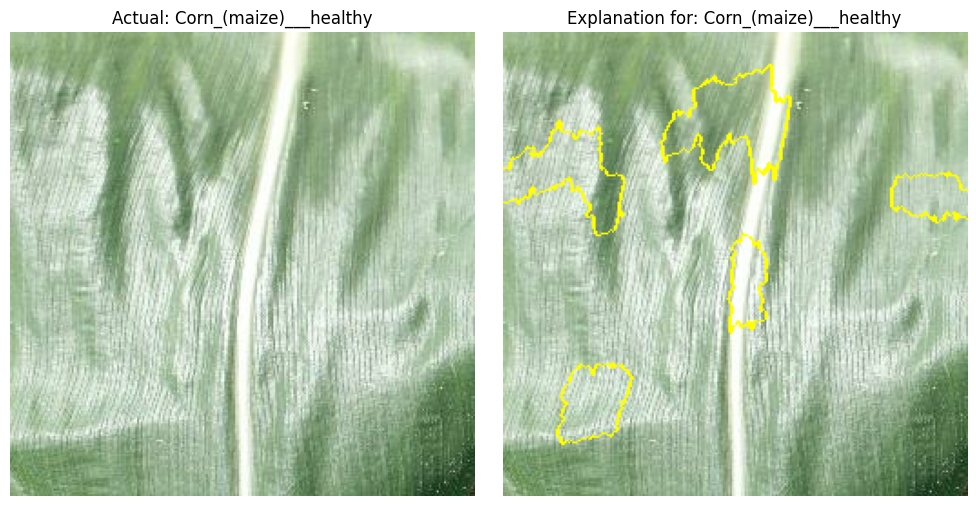

In [26]:
# Create a LIME Image Explainer object
explainer = lime_image.LimeImageExplainer()

# Ask the explainer to explain our image
print("Generating LIME explanation... (this may take a minute)")
explanation = explainer.explain_instance(
    image_to_explain, 
    predict_fn, 
    top_labels=5, 
    hide_color=0, 
    num_samples=1000
)
print("Explanation complete.")

# Get the "image and mask" for the top predicted class
# We want the explanation for the class the model *actually* predicted
temp, mask = explanation.get_image_and_mask(
    predicted_class, 
    positive_only=True, 
    num_features=5, 
    hide_rest=False
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#original image
ax1.imshow(image_to_explain)
ax1.set_title(f"Actual: {class_name_to_explain}")
ax1.axis('off')

# explained heat map
ax2.imshow(mark_boundaries(temp, mask))
ax2.set_title(f"Explanation for: {class_names[predicted_class]}")
ax2.axis('off')

plt.tight_layout()
plt.show()

# Gate network

In [28]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D, Multiply
import numpy as np

try:
    pass
except NameError:
    print("Defining EarlyStopping callback.")
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3, # 3 epochs before it stop improving
        restore_best_weights=True
    )

In [29]:
fantastic_4 = [model, loaded_model_vgg19, loaded_model_inception, loaded_model_resnet]
for i in fantastic_4:
    i.trainable = False
    i._name = f"expert_{i.name}" 

print("All 4 experts are loaded and frozen.")
print(f"VGG16 Trainable: {model.trainable}")
print(f"ResNet Trainable: {loaded_model_vgg19.trainable}")

All 4 experts are loaded and frozen.
VGG16 Trainable: False
ResNet Trainable: False


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense,
    GlobalAveragePooling2D, Multiply, Reshape, Lambda
)

# main input
main_input = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), name="main_image_input")

# freezing all four expert models (Expert models is just a name given by my tiny brain to these 4 models, it depicts nothing)
pred_vgg16 = model(main_input)
pred_vgg19 = loaded_model_vgg19(main_input)
pred_inception = loaded_model_inception(main_input)
pred_resnet = loaded_model_resnet(main_input)

# our gate network structure
x = Conv2D(16, (3, 3), activation='relu', padding='same', name='gate_conv1')(main_input)
x = MaxPooling2D((2, 2), name='gate_pool1')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='gate_conv2')(x)
x = MaxPooling2D((2, 2), name='gate_pool2')(x)
x = GlobalAveragePooling2D(name='gate_gap')(x)
gate_output = Dense(4, activation='softmax', name='gate_weights')(x)


# Add output_shape to stacked_predictions
stacked_preds = Lambda(
    lambda x: tf.stack(x, axis=1), 
    output_shape=(4, 38),
    name="stacked_predictions"
)([pred_vgg16, pred_vgg19, pred_inception, pred_resnet])

# Reshape the gate weights for multiplication: (Batch, 4, 1)
gate_weights_reshaped = Reshape((4, 1), name="reshaped_weights")(gate_output)

# Multiply: (Batch, 4, 38) * (Batch, 4, 1)
weighted_preds = Multiply(name="weighted_predictions")([stacked_preds, gate_weights_reshaped])

# Add output_shape to final_prediction
final_output = Lambda(
    lambda t: tf.reduce_sum(t, axis=1),
    output_shape=(38,),
    name="final_prediction"
)(weighted_preds)


moe_model = Model(
    inputs=main_input, 
    outputs=final_output, 
    name="Mixture_of_Experts"
)

moe_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

moe_model.summary()


Model: "Mixture_of_Experts"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ main_image_input    │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_conv1 (Conv2D) │ (None, 256, 256,  │        448 │ main_image_input… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_pool1          │ (None, 128, 128,  │          0 │ gate_conv1[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_conv2 (Conv2D) │ (None, 128, 128,  │      4,640 │ gate_pool1[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_pool2          │ (None, 64, 64,    │          0 │ gate_conv2[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_gap            │ (None, 32)        │          0 │ gate_pool2[0][0]  │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ VGG16_Transfer_Lea… │ (None, 38)        │ 14,734,182 │ main_image_input… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ VGG19_Transfer_Lea… │ (None, 38)        │ 20,043,878 │ main_image_input… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ InceptionV3_Transf… │ (None, 38)        │ 21,880,646 │ main_image_input… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ResNet101V2_Transf… │ (None, 38)        │ 42,704,422 │ main_image_input… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_weights        │ (None, 4)         │        132 │ gate_gap[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stacked_predictions │ (None, 4, 38)     │          0 │ VGG16_Transfer_L… │
│ (Lambda)            │                   │            │ VGG19_Transfer_L… │
│                     │                   │            │ InceptionV3_Tran… │
│                     │                   │            │ ResNet101V2_Tran… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshaped_weights    │ (None, 4, 1)      │          0 │ gate_weights[0][… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ weighted_predictio… │ (None, 4, 38)     │          0 │ stacked_predicti… │
│ (Multiply)          │                   │            │ reshaped_weights… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_prediction    │ (None, 38)        │          0 │ weighted_predict… │
│ (Lambda)            │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 99,368,348 (379.06 MB)

 Trainable params: 5,220 (20.39 KB)

 Non-trainable params: 99,363,128 (379.04 MB)

In [32]:
moe_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#great going 
moe_model.summary()

Model: "Mixture_of_Experts"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ main_image_input    │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_conv1 (Conv2D) │ (None, 256, 256,  │        448 │ main_image_input… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_pool1          │ (None, 128, 128,  │          0 │ gate_conv1[0][0]  │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_conv2 (Conv2D) │ (None, 128, 128,  │      4,640 │ gate_pool1[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_pool2          │ (None, 64, 64,    │          0 │ gate_conv2[0][0]  │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_gap            │ (None, 32)        │          0 │ gate_pool2[0][0]  │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ VGG16_Transfer_Lea… │ (None, 38)        │ 14,734,182 │ main_image_input… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ VGG19_Transfer_Lea… │ (None, 38)        │ 20,043,878 │ main_image_input… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ InceptionV3_Transf… │ (None, 38)        │ 21,880,646 │ main_image_input… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ResNet101V2_Transf… │ (None, 38)        │ 42,704,422 │ main_image_input… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gate_weights        │ (None, 4)         │        132 │ gate_gap[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stacked_predictions │ (None, 4, 38)     │          0 │ VGG16_Transfer_L… │
│ (Lambda)            │                   │            │ VGG19_Transfer_L… │
│                     │                   │            │ InceptionV3_Tran… │
│                     │                   │            │ ResNet101V2_Tran… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshaped_weights    │ (None, 4, 1)      │          0 │ gate_weights[0][… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ weighted_predictio… │ (None, 4, 38)     │          0 │ stacked_predicti… │
│ (Multiply)          │                   │            │ reshaped_weights… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_prediction    │ (None, 38)        │          0 │ weighted_predict… │
│ (Lambda)            │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 99,368,348 (379.06 MB)

 Trainable params: 5,220 (20.39 KB)

 Non-trainable params: 99,363,128 (379.04 MB)

In [33]:
try: 
    early_stopping_callback
except NameError:
    print("Defining EarlyStopping callback.")
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=3,
        restore_best_weights=True
    )

epochs_to_run = 20 

history_moe = moe_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs_to_run,
    callbacks=[early_stopping_callback]
)

print("Mixture of Experts (Gate Network) training complete.")

Defining EarlyStopping callback.
Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1229s 883ms/step - accuracy: 0.9845 - loss: 0.0430 - val_accuracy: 0.9750 - val_loss: 0.0753
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1185s 873ms/step - accuracy: 0.9847 - loss: 0.0424 - val_accuracy: 0.9750 - val_loss: 0.0753
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1185s 873ms/step - accuracy: 0.9839 - loss: 0.0444 - val_accuracy: 0.9750 - val_loss: 0.0753
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1187s 874ms/step - accuracy: 0.9848 - loss: 0.0429 - val_accuracy: 0.9750 - val_loss: 0.0753
Mixture of Experts (Gate Network) training complete.


# If possible saving final model

In [ ]:
moe_model_save_path = "moe_model_delta_change.h5" 

print(f"Saving your new model to {moe_model_save_path}...")

moe_model.save(moe_model_save_path)
print("Model saved successfully as .keras")

In [ ]:
moe_model.evaluate(val_ds)